# Saving and loading models

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [7]:
# help(fc_model)

# help(fc_model.Network) # Network is teh class that defines the classifier

help(fc_model.train)

print(type(fc_model))

Help on function train in module fc_model:

train(model, trainloader, testloader, criterion, optimizer, epochs=5, print_every=40)

<class 'module'>


In [5]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

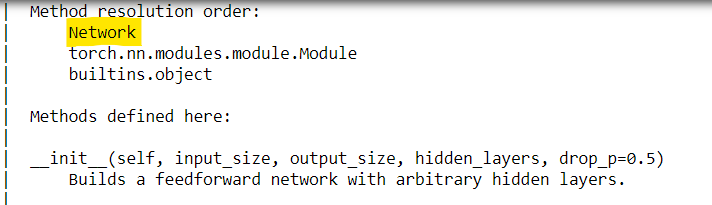

In [8]:
# Create the network, define the criterion and optimizer, TRain it

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train model
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.721..  Test Loss: 1.002..  Test Accuracy: 0.627
Epoch: 1/2..  Training Loss: 1.053..  Test Loss: 0.754..  Test Accuracy: 0.722
Epoch: 1/2..  Training Loss: 0.821..  Test Loss: 0.649..  Test Accuracy: 0.748
Epoch: 1/2..  Training Loss: 0.819..  Test Loss: 0.625..  Test Accuracy: 0.766
Epoch: 1/2..  Training Loss: 0.751..  Test Loss: 0.607..  Test Accuracy: 0.771
Epoch: 1/2..  Training Loss: 0.740..  Test Loss: 0.611..  Test Accuracy: 0.752
Epoch: 1/2..  Training Loss: 0.712..  Test Loss: 0.581..  Test Accuracy: 0.786
Epoch: 1/2..  Training Loss: 0.668..  Test Loss: 0.560..  Test Accuracy: 0.790
Epoch: 1/2..  Training Loss: 0.634..  Test Loss: 0.543..  Test Accuracy: 0.804
Epoch: 1/2..  Training Loss: 0.605..  Test Loss: 0.564..  Test Accuracy: 0.784
Epoch: 1/2..  Training Loss: 0.665..  Test Loss: 0.554..  Test Accuracy: 0.789
Epoch: 1/2..  Training Loss: 0.637..  Test Loss: 0.527..  Test Accuracy: 0.800
Epoch: 1/2..  Training Loss: 0.631..  Test Loss: 0.5

### state_dict()

Contains all the parameters of the model - weights, biases

In [10]:
print("Trained model: \n \n", model,"\n \n")

Trained model: 
 
 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 



In [12]:
print("state dictionary keys: \n \n", model.state_dict().keys())

state dictionary keys: 
 
 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


### torch.save()

can be used to save the state_dict() in a .pth file as a checkpoint

In [14]:
torch.save(model.state_dict(), 'trainedmodelcheckpoint.pth')

In [17]:
saved_state_dict = torch.load('trainedmodelcheckpoint.pth')
print(saved_state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


### load_state_dict()

This works only when model architecture matches the saved parameters

In [18]:
model.load_state_dict(saved_state_dict)


<All keys matched successfully>

### Save model architecture and state_dict

In [21]:
checkpoint = {'input_size' : 784,
              'output_size' : 10,
              'hidden_layers' : [each.out_features for each in model.hidden_layers],
              'state_dict' : model.state_dict()}
# checkpoint

torch.save(checkpoint, 'trainedmodelarchitecture.pth')

### function to load checkpoints and build the model

In [22]:
def load_checkpoint(filename):
    
    # this function loads checkpoints to create a model of type 'fc_model'
    checkpoint = torch.load(filename)
    
    #re-create model from checkpoint
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])    
    
    # load parameter into the  model
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [23]:
new_model = load_checkpoint('trainedmodelarchitecture.pth')

print(new_model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
